<a href="https://colab.research.google.com/github/muajnstu/Large_Scale_Implementation_of_DSK_Chain/blob/main/RCC_pre_processing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import math

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/muajnstu/Customer_Churn_Prediction/refs/heads/main/online_retail_customer_churn.csv")
df

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

In [ ]:
df.shape

(1000, 15)

1. Basic Cleaning

In [ ]:
# Missing values per column
missing_per_column = df.isnull().sum()
print("Missing values per column:")
print(missing_per_column)

# Total missing values in all columns
print("Total missing values in all columns:", missing_per_column.sum())

# Missing values per row
missing_per_row = df.isnull().sum(axis=1)
print("Missing values per row:")
print(missing_per_row)

# Total missing values in all rows
print("Total missing values in all rows:", missing_per_row.sum())

# Total missing values in the dataset
total_missing = df.isnull().sum().sum()
print("Total missing values in the dataset:", total_missing)

Missing values per column:
Customer_ID                   0
Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64
Total missing values in all columns: 0
Missing values per row:
0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Length: 1000, dtype: int64
Total missing values in all rows: 0
Total missing values in the dataset: 0


In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print("Duplicate rows (True means duplicate):")
print(duplicate_rows)

# Total number of duplicate rows
total_duplicates = duplicate_rows.sum()
print("Total number of duplicate rows:", total_duplicates)

Duplicate rows (True means duplicate):
0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool
Total number of duplicate rows: 0


In [ ]:
df.describe()

,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,288.819436,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,250.750000,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,500.500000,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,750.250000,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


In [ ]:
df = df.drop('Customer_ID', axis=1)
display(df.head())

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


2. Features Visualization

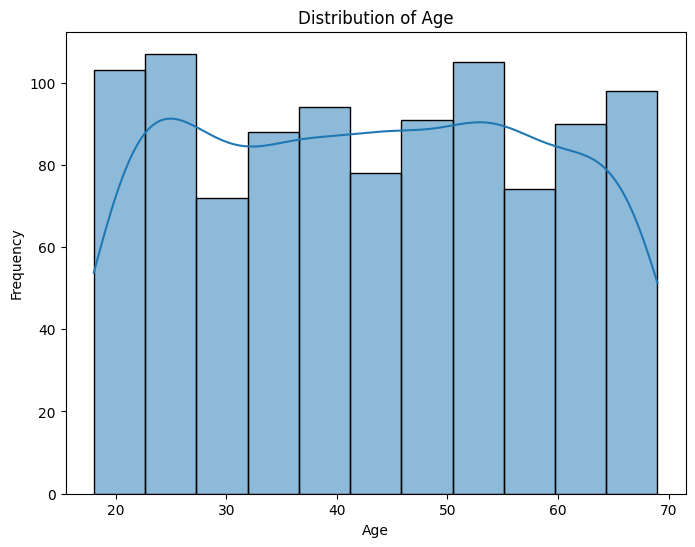

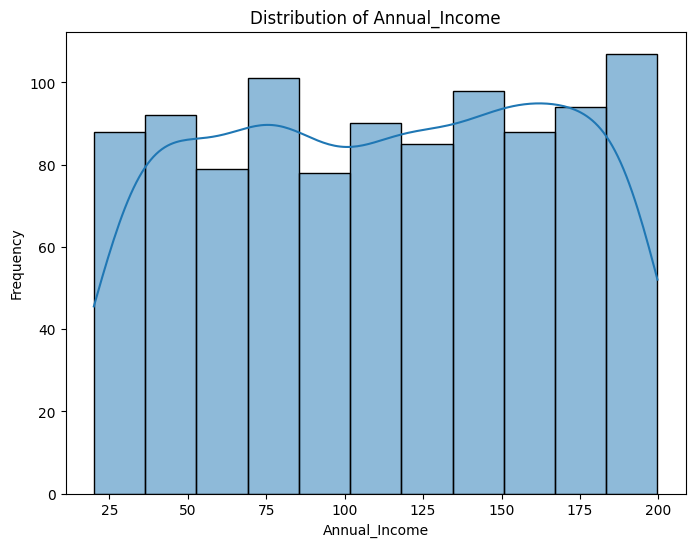

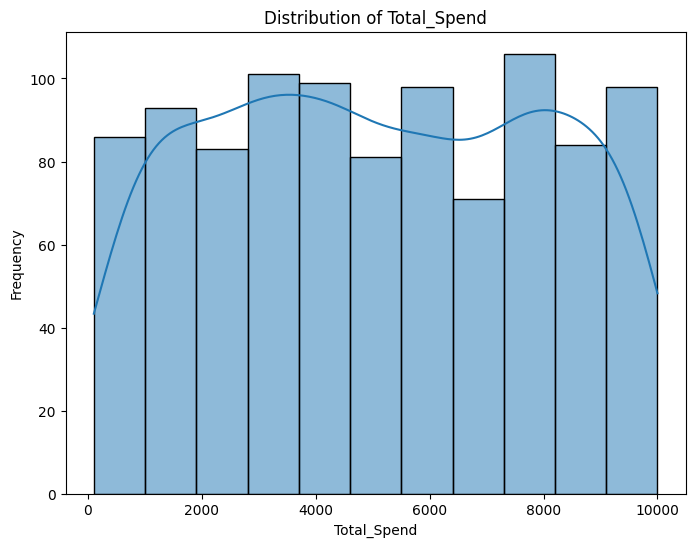

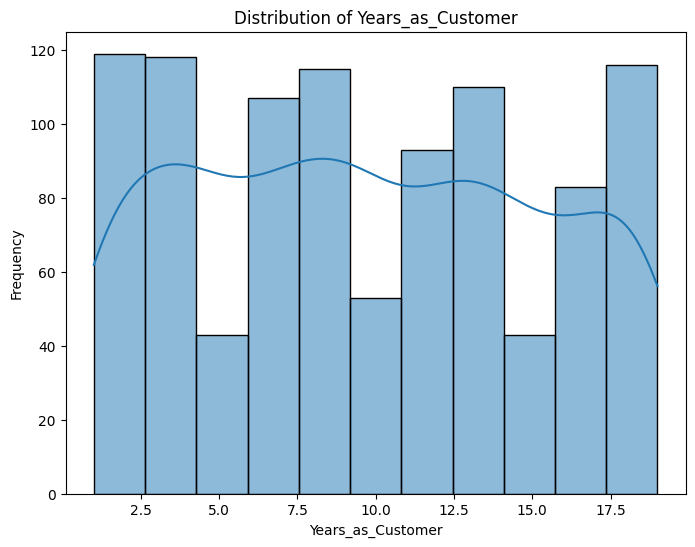

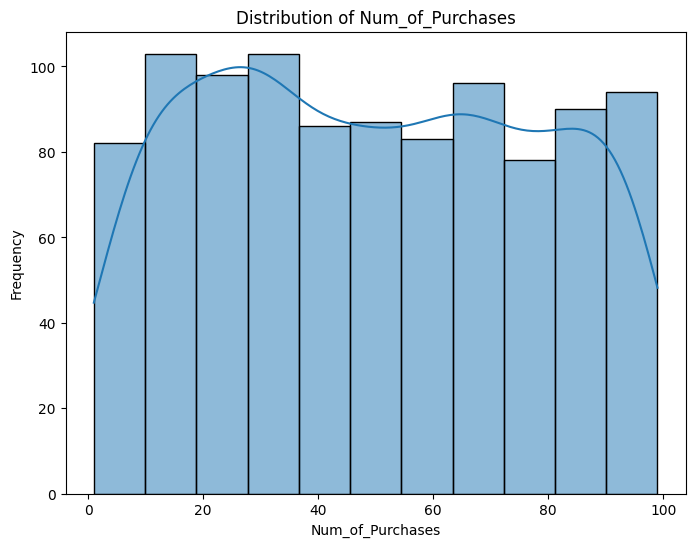

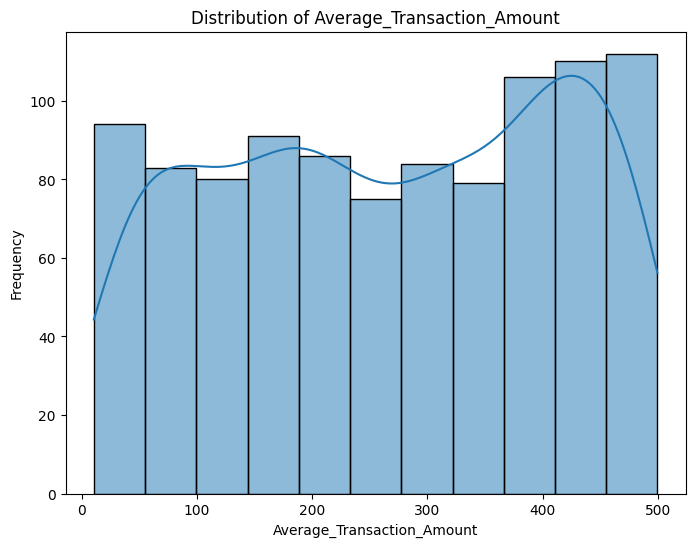

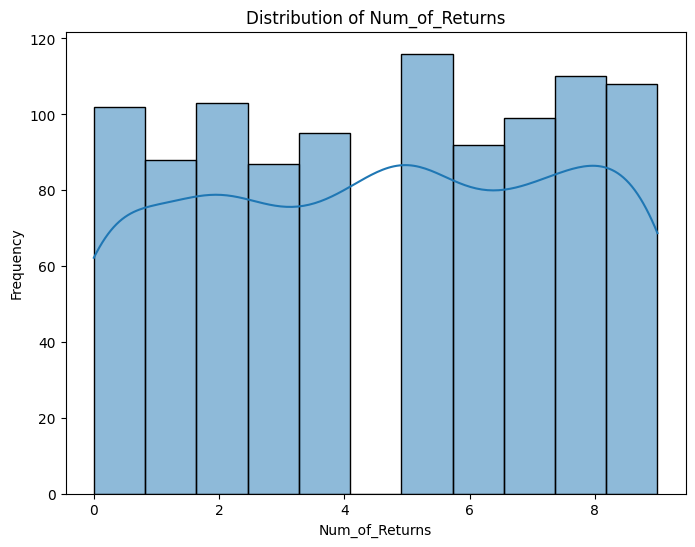

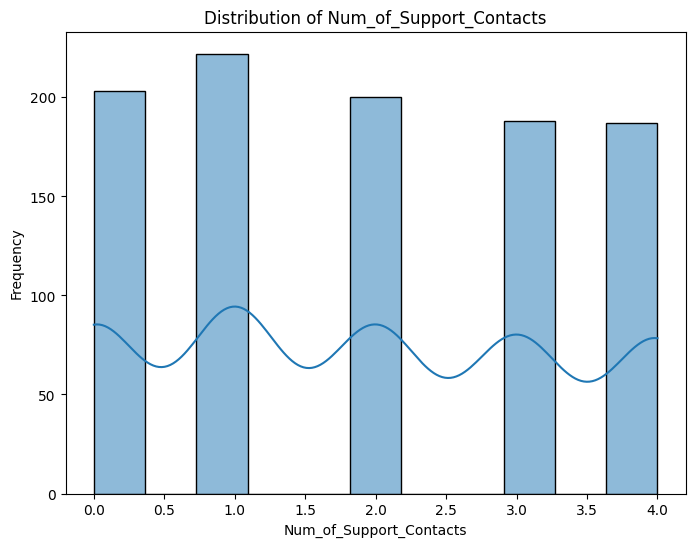

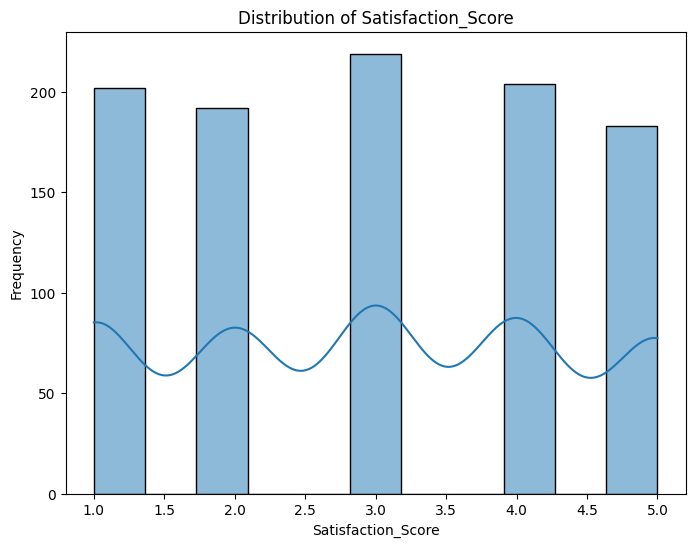

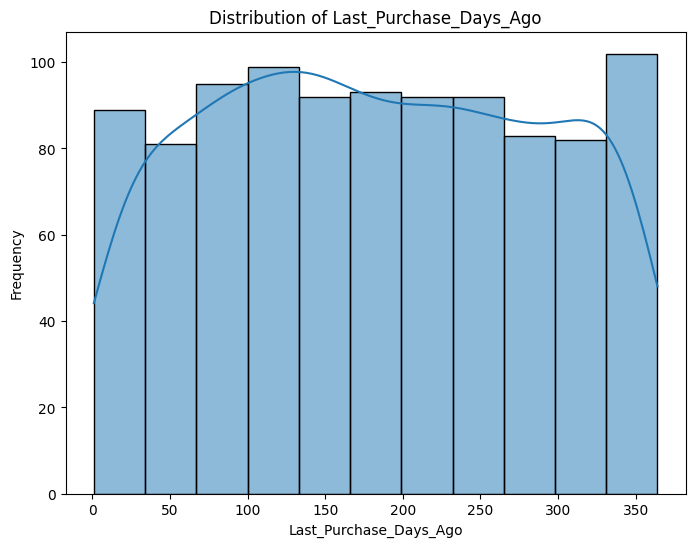

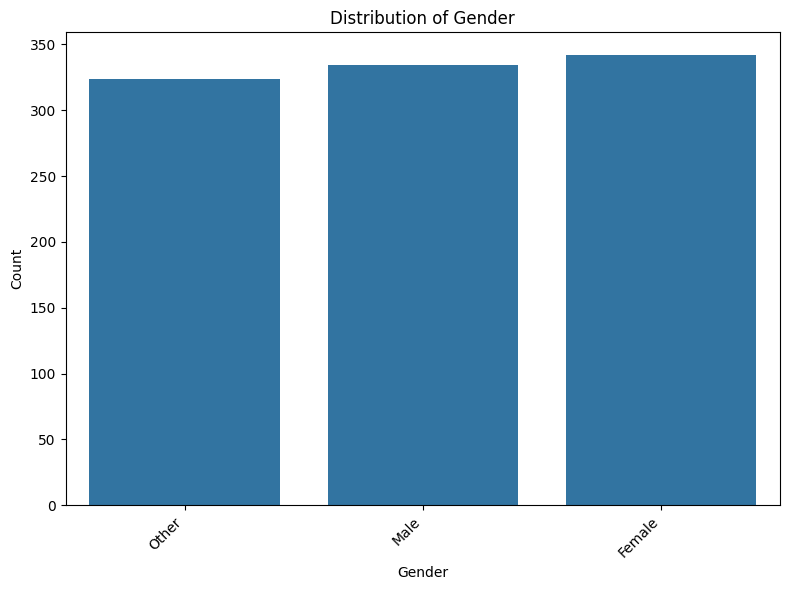

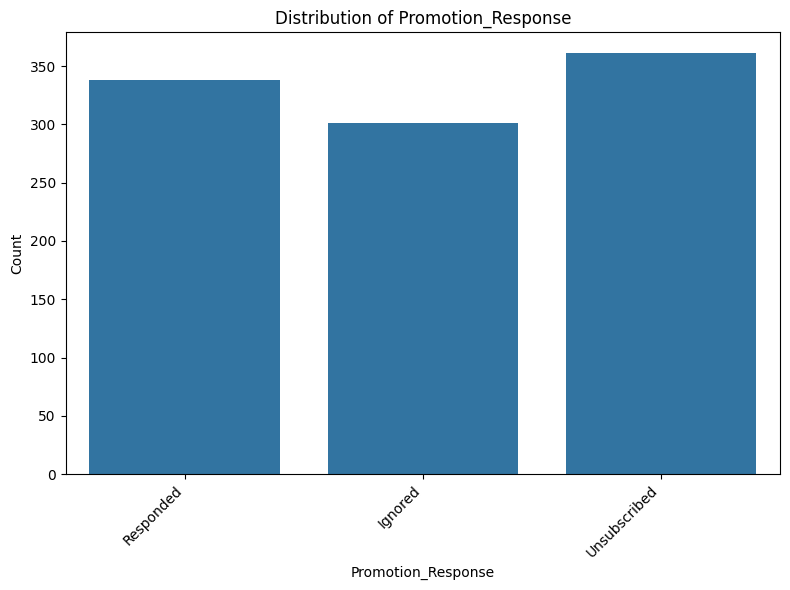

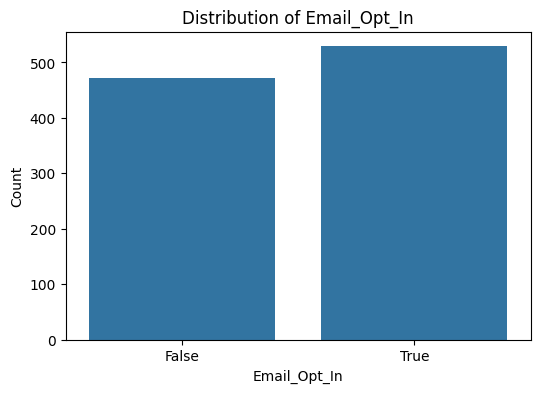

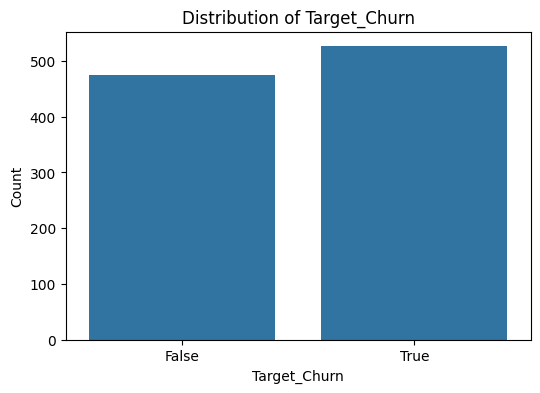

In [ ]:
# Visualize numerical features with histograms
numerical_features = df.select_dtypes(include=np.number).columns
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Visualize categorical features with bar plots
categorical_features = df.select_dtypes(include='object').columns
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Visualize boolean features with bar plots
boolean_features = df.select_dtypes(include='bool').columns
for col in boolean_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

**Observations from Feature Visualizations:**

*   **Age:** The distribution of age appears to be relatively uniform across the range of 18 to 69.
*   **Annual_Income:** The distribution of annual income seems somewhat spread out, with no clear strong peaks.
*   **Total_Spend:** Total spend also appears to have a wide distribution.
*   **Years_as_Customer:** The number of years as a customer is distributed across the range, with some potential peaks at certain year values.
*   **Num_of_Purchases:** The distribution of the number of purchases seems relatively uniform.
*   **Average_Transaction_Amount:** The average transaction amount is distributed across the range, without a clear pattern.
*   **Num_of_Returns:** The number of returns is concentrated at lower values, with fewer customers having a high number of returns.
*   **Num_of_Support_Contacts:** The number of support contacts is also concentrated at lower values.
*   **Satisfaction_Score:** Satisfaction scores are distributed across the range of 1 to 5, with no single score being significantly more frequent than others.
*   **Last_Purchase_Days_Ago:** The distribution of days since the last purchase appears relatively spread out.
*   **Gender:** The dataset has a relatively balanced distribution of genders, with 'Male' and 'Female' being the most frequent.
*   **Promotion_Response:** The 'Ignored' response to promotions is the most frequent, followed by 'Responded' and 'Unsubscribed'.
*   **Email_Opt_In:** There are more customers who have not opted in for emails than those who have.
*   **Target_Churn:** The target variable shows a relatively balanced distribution between True (churn) and False (no churn), which is good for model training.

3. Encoding Processes

In [ ]:
# One-hot encode 'Gender' and 'Promotion_Response'
df = pd.get_dummies(df, columns=['Gender', 'Promotion_Response'], drop_first=True)

# Label encode boolean features
label_encoder = LabelEncoder()
df['Email_Opt_In'] = label_encoder.fit_transform(df['Email_Opt_In'])
df['Target_Churn'] = label_encoder.fit_transform(df['Target_Churn'])

display(df.head())

,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Target_Churn,Gender_Male,Gender_Other,Promotion_Response_Responded,Promotion_Response_Unsubscribed
0,62,45.15,5892.58,5,22,453.80,2,0,3,129,1,1,False,True,True,False
1,65,79.51,9025.47,13,77,22.90,2,2,3,227,0,0,True,False,True,False
2,18,29.19,618.83,13,71,50.53,5,2,2,283,0,1,True,False,True,False
3,21,79.63,9110.30,3,33,411.83,5,3,5,226,1,1,False,True,False,False
4,21,77.66,5390.88,15,43,101.19,3,0,5,242,0,0,False,True,False,True


In [ ]:
# Convert all boolean columns to integer (0 and 1)
boolean_cols = df.select_dtypes(include='bool').columns
for col in boolean_cols:
    df[col] = df[col].astype(int)

display(df.head())

,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Target_Churn,Gender_Male,Gender_Other,Promotion_Response_Responded,Promotion_Response_Unsubscribed
0,62,45.15,5892.58,5,22,453.80,2,0,3,129,1,1,0,1,1,0
1,65,79.51,9025.47,13,77,22.90,2,2,3,227,0,0,1,0,1,0
2,18,29.19,618.83,13,71,50.53,5,2,2,283,0,1,1,0,1,0
3,21,79.63,9110.30,3,33,411.83,5,3,5,226,1,1,0,1,0,0
4,21,77.66,5390.88,15,43,101.19,3,0,5,242,0,0,0,1,0,1


4. Spearman Correlation Heatmap

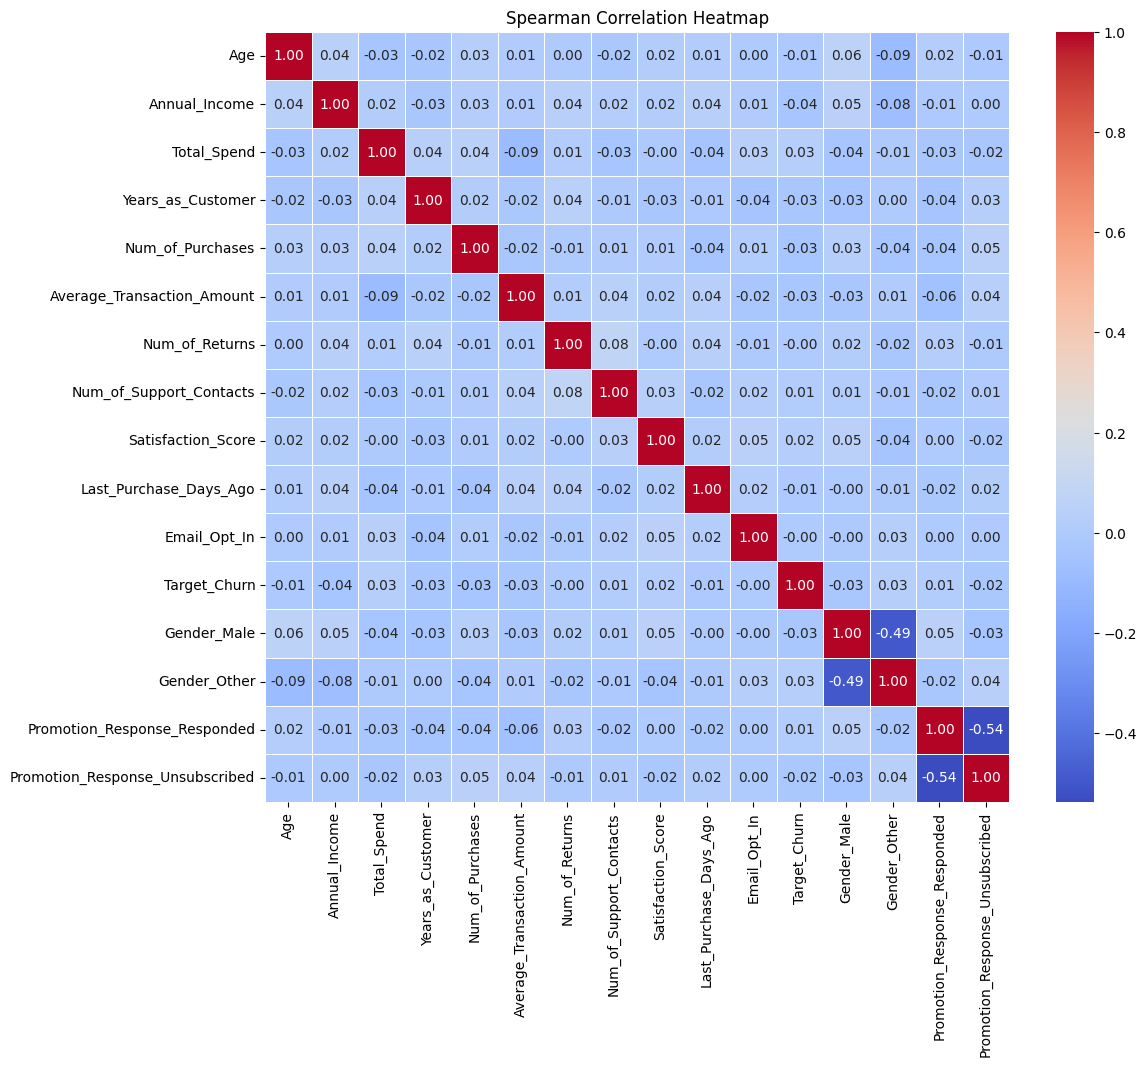

In [ ]:
# Calculate the Spearman correlation matrix
correlation_matrix = df.corr(method='spearman')

# Generate a heatmap of the full correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

In [ ]:
# Calculate variance for each column
variances = df.var()
print("Variances of each column:")
print(variances)

# Set a threshold for low variance
variance_threshold = 0.02

# Identify columns with variance below the threshold
low_variance_cols = variances[variances < variance_threshold].index.tolist()

print(f"\nColumns with variance below {variance_threshold}:")
print(low_variance_cols)

# Drop the low variance columns
if low_variance_cols:
    df = df.drop(columns=low_variance_cols)
    print(f"\nDropped columns: {low_variance_cols}")
else:
    print("\nNo columns found with variance below the threshold.")

display(df.head())

Variances of each column:
Age                                2.323280e+02
Annual_Income                      2.792500e+03
Total_Spend                        8.191750e+06
Years_as_Customer                  3.065112e+01
Num_of_Purchases                   8.147368e+02
Average_Transaction_Amount         2.127906e+04
Num_of_Returns                     8.391848e+00
Num_of_Support_Contacts            1.967612e+00
Satisfaction_Score                 1.937261e+00
Last_Purchase_Days_Ago             1.089755e+04
Email_Opt_In                       2.494084e-01
Target_Churn                       2.495736e-01
Gender_Male                        2.226667e-01
Gender_Other                       2.192432e-01
Promotion_Response_Responded       2.239800e-01
Promotion_Response_Unsubscribed    2.309099e-01
dtype: float64

Columns with variance below 0.02:
[]

No columns found with variance below the threshold.


,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Target_Churn,Gender_Male,Gender_Other,Promotion_Response_Responded,Promotion_Response_Unsubscribed
0,62,45.15,5892.58,5,22,453.80,2,0,3,129,1,1,0,1,1,0
1,65,79.51,9025.47,13,77,22.90,2,2,3,227,0,0,1,0,1,0
2,18,29.19,618.83,13,71,50.53,5,2,2,283,0,1,1,0,1,0
3,21,79.63,9110.30,3,33,411.83,5,3,5,226,1,1,0,1,0,0
4,21,77.66,5390.88,15,43,101.19,3,0,5,242,0,0,0,1,0,1


In [ ]:
df.to_csv('processed_online_retail_customer_churn.csv', index=False)

print("Processed dataset saved to 'processed_online_retail_customer_churn.csv")

Processed dataset saved to 'processed_online_retail_customer_churn.csv
